### Tarefa:
Neste projeto, será construido um classificador para prever se um caso de empréstimo poderá ser pago ou não.

Iremos carregar um conjunto de dados históricos de solicitações para empréstimos anteriores, limpar os dados e aplicar algoritmos de classificação diferentes. Serão usados os seguintes algoritmos para construir os modelos:

### Neste Notebook será aplicado o seguinte modelo: **k-vizinhos mais próximos**

Árvore de decisão

Máquina de vetores de suporte (SVM)

Regressão logística

O resultado é relatado como a precisão de cada classificador, usando as seguintes métricas quando estas são aplicáveis:

#### Índice de Jaccard

#### F1-score

#### LogLoass


<h1>Indice</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#about_dataset">O nosso conjunto de dados</a></li>
        <li><a href="https://#Visualização_análise_dados">Visualização e análise de dados</a></li>
        <li><a href="https://#divisao_treino">Divisão Treino/Teste</a></li>
        <li><a href="https://#classification">K-Nearest Neighbors</a></li>
        <li><a href="https://#treino">Treinamento</a></li>
        <li><a href="https://#previsao">Previsão</a></li>
        <li><a href="https://#avaliacao_acuracia">Avaliação da acurácia</a></li>
        <li><a href="https://#melhorar_acuracia">Tentar melhorar a acurácia</a></li>
        <li><a href="https://#grafico_acuracia_k">Gráfico da acurácia do modelo KNN para diferentes valores de K</a></li>
        <li><a href="https://#resultados">Resultados</a></li>
        <li><a href="https://#jaccard">índice de Jaccard</a></li>
        <li><a href="https://#f1-score">F1-score</a></li>
        <li><a href="https://#logloss">LogLoss</a></li>
        <li><a href="https://#o_grafico">O Gráfico KNN</a></li>
    </ol>
</div>
<br>
<hr>



<div id="about_dataset">
    <h2>O nosso conjunto de dados</h2>
</div>

Vamos começar por criar um conjunto de dados histórico de solicitações para empréstimos anteriores.

O código (Python) a seguir é usado para gerar um arquivo CSV com as colunas abaixo indicadas e valores aleatórios. Vou utilizar a biblioteca pandas e random para facilitar a criação e gravação do arquivo.

**Número** (sequencial)

**Região** (1, 2, 3 ou 4)

**Idade** (entre 18 e 65 anos)

**Casado** (1 ou 0)

**Rendimentos** (entre 100 e 200)

**Género** (1 ou 0)

**Aprovação** (1 ou 0)

Uma vez que a base de dados que constitui o DataFrame é fictício e para facilitar a interpretação dos dados vamos criar algumas condições para a aprovação dos empréstimos.


In [35]:
import pandas as pd
import random

# Número de registros no conjunto de dados
num_registros = 1000

# Inicializando listas vazias para cada coluna
numeros = []
regioes = []
idades = []
casados = []
rendimentos = []
generos = []
aprovacoes = []

# Gerando valores aleatórios para cada coluna
for i in range(num_registros):
    numeros.append(i+1)
    regioes.append(random.choice([1, 2, 3, 4]))
    idades.append(random.randint(18, 65))
    casados.append(random.choice([1, 0]))
    rendimentos.append(random.randint(100, 200))
    generos.append(random.choice([1, 0]))
    aprovacoes.append(random.choice([1, 0]))

# Criando um DataFrame pandas com os dados gerados
dados = pd.DataFrame({
    'Número': numeros,
    'Região': regioes,
    'Idade': idades,
    'Casado': casados,
    'Rendimentos': rendimentos,
    'Género': generos,
    'Aprovação': aprovacoes
})

# Atualizando a coluna 'Aprovação' de acordo com as condições especificadas
for index, row in dados.iterrows():
    if row['Idade'] > 40 and row['Casado'] == 1 and row['Rendimentos'] > 150:
        dados.at[index, 'Aprovação'] = 1

# Escrevendo os dados em um arquivo CSV
# dados.to_csv('dados_emprestimos.csv', index=False)


<div id="Visualização_análise_dados">
    <h2>Visualização e análise de dados</h2> 
</div>

Agora vamos ver as primeiras cinco linhas do DataFrame que acabamos de criar

In [36]:
dados.head()

,Número,Região,Idade,Casado,Rendimentos,Género,Aprovação
0,1,4,47,1,109,0,0
1,2,4,33,0,154,1,1
2,3,4,39,0,115,1,0
3,4,4,19,0,154,1,1
4,5,1,56,0,185,0,1


Vamos ver um resumo estatístico das colunas do nosso DataFrame

Este resumo inclui medidas estatísticas como contagem, média, desvio padrão, mínimo, máximo e os percentis (25%, 50% e 75%). Aqui está uma explicação de cada medida:


**count**: número de registros não nulos ou não faltantes na coluna.

**mean**: média aritmética dos valores na coluna.

**std**: desvio padrão, que é uma medida de dispersão que indica o quanto os valores se desviam da média.

**min**: valor mínimo na coluna.

**25%**: primeiro quartil (Q1), que é o valor que separa os 25% mais baixos dos valores na coluna.

**50%**: segundo quartil (Q2) ou mediana, que é o valor que separa os 50% mais baixos dos valores na coluna.

**75%**: terceiro quartil (Q3), que é o valor que separa os 75% mais baixos dos valores na coluna.

**max**: valor máximo na coluna.

In [37]:
dados.describe()

,Número,Região,Idade,Casado,Rendimentos,Género,Aprovação
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,2.527000,41.340000,0.52000,150.155000,0.492000,0.564000
std,288.819436,1.116475,13.977617,0.49985,29.349077,0.500186,0.496135
min,1.000000,1.000000,18.000000,0.00000,100.000000,0.000000,0.000000
25%,250.750000,2.000000,30.000000,0.00000,125.000000,0.000000,0.000000
50%,500.500000,2.000000,41.000000,1.00000,151.000000,0.000000,1.000000
75%,750.250000,4.000000,54.000000,1.00000,175.000000,1.000000,1.000000
max,1000.000000,4.000000,65.000000,1.00000,200.000000,1.000000,1.000000


Agora vamos ver quantos emprestimos foram Aprovados (1) e quantos foram Reprovados (0)

In [38]:
dados['Aprovação'].value_counts()

1    564
0    436
Name: Aprovação, dtype: int64

Vamos explorar os nossos dados usando uma técnica de visualização.

array([[<AxesSubplot:title={'center':'Rendimentos'}>]], dtype=object)

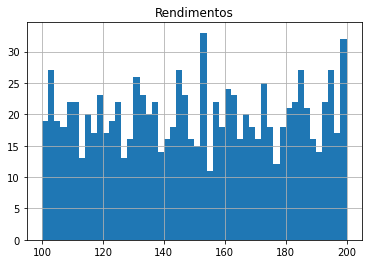

In [39]:
dados.hist(column='Rendimentos', bins=50)

<div id="classification">
    <h2>K-Nearest Neighbors</h2> 
</div>

### Agora vamos usar o algoritmo K-Nearest Neighbors para classificar os dados

Para usar a biblioteca scikit-learn, precisamos converter o DataFrame do pandas para um array do Numpy.

Neste trecho de código, estamos a selecionar apenas as colunas 'Região', 'Idade', 'Casado', 'Rendimentos' e 'Género' do DataFrame dados e a converter o resultado em um array do Numpy usando a propriedade .values. O resultado é armazenado na variável X.

Depois vamos exibir as primeiras cinco linhas do array do Numpy X. A notação de fatiamento 0:5 seleciona as linhas de índice 0 a 4

In [40]:
X = dados[['Região', 'Idade', 'Casado', 'Rendimentos', 'Género']].values
X[0:5]

array([[  4,  47,   1, 109,   0],
       [  4,  33,   0, 154,   1],
       [  4,  39,   0, 115,   1],
       [  4,  19,   0, 154,   1],
       [  1,  56,   0, 185,   0]])

### Agora vamos definir a nossa variável dependente.

Vamos selecionar a coluna 'Aprovação' do DataFrame dados e converte-la em um array do Numpy usando a propriedade .values. O resultado é armazenado na variável y. Essa variável representa o nosso rótulo, ou seja, os valores de aprovação (1) ou recusa (0) de empréstimos que queremos prever com base nos atributos fornecidos.

Depois vamos exibir as primeiras cinco linhas do array do Numpy y. A notação de fatiamento 0:5 seleciona os elementos de índice 0 a 4 (o último índice não é incluído).

In [41]:
y = dados['Aprovação'].values
y[0:5]

array([0, 1, 0, 1, 1])

A padronização de dados é uma técnica de pré-processamento que transforma os dados para que eles tenham média zero e variância unitária. Isso é especialmente útil para algoritmos de aprendizado de máquina, como o KNN (k-Nearest Neighbors), que calcula a distância entre os pontos de dados para fazer previsões.

Vamos de seguida aplicar a padronização aos dados no array X.

Primeiro, importamos a classe StandardScaler do módulo preprocessing da biblioteca scikit-learn.

Em seguida, instanciamos um objeto StandardScaler e o ajustamos aos dados em X usando o método fit().

Depois disso, transformamos os dados de X usando o método transform() e convertendo-os em valores do tipo float com X.astype(float).

O resultado da padronização é armazenado de volta na variável X.

In [42]:
from sklearn import preprocessing

In [43]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))

X[0:5]

array([[ 1.31999051,  0.40513574,  0.96076892, -1.40296039, -0.98412598],
       [ 1.31999051, -0.59696679, -1.040833  ,  0.13107478,  1.01613007],
       [ 1.31999051, -0.16749428, -1.040833  , -1.19842236,  1.01613007],
       [ 1.31999051, -1.59906932, -1.040833  ,  0.13107478,  1.01613007],
       [-1.3683812 ,  1.04934451, -1.040833  ,  1.18785457, -0.98412598]])

<div id="divisao_treino">
    <h2>Divisão Treino/Teste</h2>
</div>

A Acurácia fora da amostra é a porcentagem de previsões corretas que o modelo faz em dados que ele NÃO foi treinado. Fazer um treino e teste no mesmo conjunto de dados provavelmente resultará em uma baixa acurácia fora da amostra, devido à possibilidade de nosso modelo apresentar overfitting (sobreajuste).

É importante que nossos modelos tenham uma alta acurácia fora da amostra, porque o propósito de qualquer modelo, é claro, é fazer previsões corretas em dados desconhecidos. Então, como podemos melhorar a acurácia fora da amostra? Uma maneira é usar uma abordagem de avaliação chamada Divisão Treino/Teste. A Divisão Treino/Teste envolve dividir o conjunto de dados em conjuntos de treinamento e teste, respectivamente, que são mutuamente exclusivos. Depois disso, você treina com o conjunto de treinamento e testa com o conjunto de teste.

Isso fornecerá uma avaliação mais precisa da acurácia fora da amostra, porque o conjunto de dados de teste não faz parte do conjunto de dados usado para treinar o modelo. É mais realista para problemas do mundo real.

Ou seja, nos parágrafos a cima, é explicada a importância da divisão treino/teste como uma técnica para avaliar a capacidade do modelo de fazer previsões corretas em dados desconhecidos. A ideia é separar os dados em dois conjuntos mutuamente exclusivos, um para treinar o modelo e outro para testá-lo, permitindo uma avaliação mais realista e evitando o problema de sobreajuste.

A seguir vamos importar a função train_test_split da biblioteca scikit-learn e usa-la para dividir os dados em conjuntos de treinamento e teste.

A divisão é feita de forma a separar 20% dos dados para o conjunto de teste e os outros 80% para o conjunto de treinamento.

Depois, são impressas as dimensões dos conjuntos de treinamento e teste, mostrando o número de linhas e colunas em cada um.

In [44]:
# Importa a função train_test_split do módulo model_selection da biblioteca scikit-learn
from sklearn.model_selection import train_test_split

# Divide os dados em conjuntos de treinamento e teste usando a função train_test_split
# X e y são os dados e os rótulos, respectivamente
# test_size=0.2 define que 20% dos dados serão usados para o conjunto de teste
# random_state=4 é usado para garantir resultados reproduzíveis ao dividir os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Imprime o formato (número de linhas e colunas) dos conjuntos de treinamento (X_train e y_train)
print('Train set:', X_train.shape, y_train.shape)

# Imprime o formato (número de linhas e colunas) dos conjuntos de teste (X_test e y_test)
print('Test set:', X_test.shape, y_test.shape)


Train set: (800, 5) (800,)
Test set: (200, 5) (200,)


<div id="classification">
    <h2>Classificação</h2>
</div>

<h3>K nearest neighbor (KNN)</h3>

Vamos importar o classificador que implementa a votação dos k-vizinhos mais próximos.

O k-Nearest Neighbors é um algoritmo de aprendizado supervisionado utilizado para classificação e regressão. Ele funciona encontrando os "k" exemplos de treinamento mais próximos de um novo ponto de dados e prevendo a classe (para classificação) ou valor (para regressão) com base nessas amostras próximas.

Vamos importar a classe KNeighborsClassifier do módulo neighbors da biblioteca scikit-learn.

A classe KNeighborsClassifier é a implementação do algoritmo k-Nearest Neighbors para problemas de classificação no scikit-learn. Ao importar essa classe, podemos criar um objeto KNeighborsClassifier para treinar um modelo de classificação k-NN e fazer previsões com base nos dados fornecidos.

In [45]:
from sklearn.neighbors import KNeighborsClassifier

<div id="treino">
    <h2>Treinamento</h2>
</div>

Vamos começar o algoritmo com k=4 por enquanto.

Neste trecho de código, estamos definindo o valor de k (número de vizinhos mais próximos) como 4 e criando uma instância da classe KNeighborsClassifier com esse valor.

Em seguida, ajustamos (treinamos) o modelo usando os dados de treinamento (X_train e y_train). 

Por fim, imprimimos o objeto neigh, que é a instância treinada do modelo KNeighborsClassifier.

Aqui, estamos treinando um modelo k-NN para classificação, utilizando o valor de k=4, o que significa que o modelo irá considerar os 4 vizinhos mais próximos ao fazer previsões.

In [46]:
# Define o valor de k, que é o número de vizinhos mais próximos a serem considerados
k = 4

# Cria uma instância da classe KNeighborsClassifier com o valor de k definido
# Em seguida, ajusta (treina) o modelo usando os dados de treinamento (X_train e y_train)
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

# Imprime o objeto neigh, que é a instância treinada do modelo KNeighborsClassifier
print(neigh)


KNeighborsClassifier(n_neighbors=4)


<div id="previsao">
    <h2>Previsão</h2>
</div>

Podemos usar o modelo para fazer previsões no conjunto de teste.

Neste trecho de código, estamos usando o modelo k-NN treinado (armazenado no objeto **neigh**) para fazer previsões no conjunto de teste **X_test**. O método **predict()** da instância **neigh** é utilizado para gerar as previsões, que são armazenadas na variável **yhat**. Em seguida, imprimimos as primeiras cinco previsões armazenadas em **yhat**.

In [47]:
# Utiliza o modelo treinado (neigh) para fazer previsões no conjunto de teste (X_test)
yhat = neigh.predict(X_test)

# Imprime as primeiras 5 previsões feitas pelo modelo no conjunto de teste
print(yhat[0:5])


[1 0 1 0 0]


As previsões a cima, podem ser comparadas com os rótulos reais do conjunto de teste (**y_test**) para avaliar o desempenho do modelo em termos de acurácia, precisão, revocação, F1-score, entre outras métricas de avaliação.

<div id="avaliacao_acuracia">
    <h2>Avaliação da acurácia</h2>
</div>

Na classificação multirrótulo, a função de pontuação de acurácia da classificação é uma função que calcula a acurácia do subconjunto. Essa função é igual à função **jaccard_score**. Essencialmente, ela calcula o quão próximos os rótulos reais e os rótulos previstos estão no conjunto de teste.

Neste trecho de código, vamos importar o módulo **metrics** da biblioteca scikit-learn e usar a função **accuracy_score** para calcular a acurácia do modelo nos conjuntos de treinamento e teste.

A acurácia é uma medida de desempenho que indica a proporção de previsões corretas feitas pelo modelo em relação ao total de previsões.

Primeiro, calculamos a acurácia do conjunto de treinamento comparando os rótulos reais (**y_train**) com as previsões feitas pelo modelo no conjunto de treinamento.

Em seguida, calculamos a acurácia do conjunto de teste comparando os rótulos reais (**y_test**) com as previsões feitas pelo modelo no conjunto de teste (**yhat**).

Esses valores nos ajudam a entender o quão bem o modelo está se saindo tanto nos dados de treinamento quanto nos dados de teste.

In [48]:
# Importa o módulo metrics da biblioteca scikit-learn, que fornece funções para avaliação de modelos
from sklearn import metrics

# Calcula e imprime a acurácia do modelo no conjunto de treinamento
# Compara os rótulos reais (y_train) com as previsões feitas pelo modelo no conjunto de treinamento
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))

# Calcula e imprime a acurácia do modelo no conjunto de teste
# Compara os rótulos reais (y_test) com as previsões feitas pelo modelo no conjunto de teste (yhat)
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))


Train set Accuracy:  0.705
Test set Accuracy:  0.56


In [61]:
if metrics.accuracy_score(y_test, yhat) > 0.5:
    print('Boa')
else:
    print('Mau')

Boa


**Train set Accuracy**: 0.705 - Este valor significa que o modelo fez previsões corretas para 70% dos exemplos no conjunto de treinamento. Em outras palavras, o modelo classificou corretamente 66% das solicitações de empréstimo no conjunto de treinamento. Isso indica que o modelo tem um desempenho razoável nos dados de treinamento.

**Test set Accuracy**: 0.56 - Este valor significa que o modelo fez previsões corretas para 46,5% dos exemplos no conjunto de teste. Em outras palavras, o modelo classificou corretamente 56% das solicitações de empréstimo no conjunto de teste. A acurácia do conjunto de teste é consideravelmente menor que a acurácia do conjunto de treinamento, o que pode indicar que o modelo não está generalizando bem para novos dados.

A diferença entre as acurácias do conjunto de treinamento e teste sugere que o modelo pode estar sofrendo de overfitting (sobreajuste). Overfitting ocorre quando um modelo se ajusta muito bem aos dados de treinamento, mas não consegue generalizar bem para novos dados. Isso pode ser causado por várias razões, como um valor de k inadequado, falta de regularização ou dados insuficientes.

Para melhorar o desempenho do modelo, você pode tentar ajustar o valor de k, usar técnicas de validação cruzada para selecionar o melhor valor de k, ou até mesmo coletar mais dados e/ou realizar pré-processamento dos dados para melhorar a qualidade das informações fornecidas ao modelo.

Uma outra razão pode ser o facto do **modelo ter sido gerado de forma aleatória** e não representar nenhum histórico de solicitações para empréstimos real, mas sim um imaginário.

No entanto para fins didáticos, vamos tentar com um valor de **k** diferente (6):

In [50]:
# Define o valor de k, que é o número de vizinhos mais próximos a serem considerados
k = 6

# Cria uma instância da classe KNeighborsClassifier com o valor de k definido
# Em seguida, ajusta (treina) o modelo usando os dados de treinamento (X_train e y_train)
neigh6 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

# Utiliza o modelo treinado (neigh6) para fazer previsões no conjunto de teste (X_test)
yhat6 = neigh6.predict(X_test)

# Calcula e imprime a acurácia do modelo no conjunto de treinamento
# Compara os rótulos reais (y_train) com as previsões feitas pelo modelo no conjunto de treinamento
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh6.predict(X_train)))

# Calcula e imprime a acurácia do modelo no conjunto de teste
# Compara os rótulos reais (y_test) com as previsões feitas pelo modelo no conjunto de teste (yhat)
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat6))


Train set Accuracy:  0.6925
Test set Accuracy:  0.575


**Train set Accuracy**: 0.6925 - O valor das previsões corretas baixou ligeiramente.

**Test set Accuracy**:  0.575 - No entanto o modelo aumentou a percentagem das previsões corretas.

<div id="melhorar_acuracia">
    <h2>Tentar melhorar a acurácia</h2>
</div>

Escolher o valor adequado de K é uma parte importante do processo de ajuste do modelo KNN. Para encontrar o melhor valor de K, podemos seguir os seguintes passos abaixo:

Dividir os dados em conjuntos de treinamento e teste, como já fizemos anteriormente.

Escolher um valor inicial de k, como k=1.

Treinar o modelo KNN usando o conjunto de treinamento e o valor de k atual.

Calcular a acurácia (ou outra métrica de desempenho) do modelo nas previsões feitas no conjunto de teste.

Aumentar o valor de k e repitir os passos 3 e 4.

Continue a aumentar o valor de k e comparar a acurácia (ou outra métrica) no conjunto de teste até encontrar o valor de k que produz o melhor desempenho.

Aqui está um exemplo de código que realiza esse processo para diferentes valores de k:


In [51]:
from sklearn import metrics

# Lista para armazenar as acurácias para cada valor de k
accuracies = []

# Intervalo de valores de k a serem testados
k_range = range(1, 21)

# Loop para treinar o modelo com diferentes valores de k e calcular a acurácia
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Encontre o valor de k com a maior acurácia
best_k = k_range[accuracies.index(max(accuracies))]

print("Melhor valor de k:", best_k)
print("Acurácia no conjunto de teste para o melhor k:", max(accuracies))


Melhor valor de k: 19
Acurácia no conjunto de teste para o melhor k: 0.63


<div id="grafico_acuracia_k">
    <h2>Gráfico da acurácia do modelo KNN para diferentes valores de K</h2>
</div>

Vamos usar a biblioteca **matplotlib** para criar um gráfico de linha que mostra a acurácia do modelo KNN no conjunto de teste para diferentes valores de K.

O eixo **x** representa o número de vizinhos (**K**) e o eixo **y** representa a acurácia correspondente. 

O gráfico ajuda a visualizar a relação entre o número de vizinhos e o desempenho do modelo, facilitando a seleção de um valor apropriado para K.

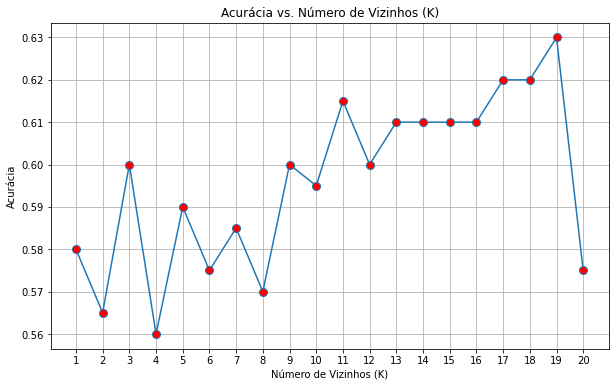

In [52]:
import matplotlib.pyplot as plt

# Lista para armazenar as acurácias para cada valor de k
accuracies = []

# Intervalo de valores de k a serem testados
k_range = range(1, 21)

# Loop para treinar o modelo com diferentes valores de k e calcular a acurácia
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Cria um gráfico de linha mostrando a acurácia para diferentes valores de k
plt.figure(figsize=(10, 6))
plt.plot(k_range, accuracies, marker='o', linestyle='-', markersize=8, markerfacecolor='red')
plt.title('Acurácia vs. Número de Vizinhos (K)')
plt.xlabel('Número de Vizinhos (K)')
plt.ylabel('Acurácia')
plt.xticks(k_range)
plt.grid()
plt.show()


<div id="resultados">
    <h2>Resultados</h2>
</div>

<div id="jaccard">
    <h2>índice de Jaccard</h2>
</div>

**Índice de Jaccard**: É uma métrica que compara a semelhança entre dois conjuntos. No contexto de classificação, é calculado como a interseção dos conjuntos de rótulos verdadeiros e previstos dividido pela união desses conjuntos. O valor varia entre 0 e 1, sendo 1 a melhor pontuação possível.

In [53]:
from sklearn.metrics import jaccard_score

jaccard = jaccard_score(y_test, y_pred, average='weighted')
print('Índice de Jaccard:', jaccard)


Índice de Jaccard: 0.4146429636255218


O **índice de Jaccard** é aproximadamente **0.41**.

Isso significa que a similaridade entre os rótulos verdadeiros e previstos é relativamente baixa, indicando que o desempenho do seu modelo de classificação pode ser melhorado.

Um índice de Jaccard maior indicaria uma maior correspondência entre os rótulos verdadeiros e previstos e, portanto, um melhor desempenho do modelo.

<div id="f1-score">
    <h2>F1-score</h2>
</div>

**F1-score**: É uma métrica que combina precisão e recall em uma única pontuação, levando em consideração tanto a proporção de verdadeiros positivos quanto a proporção de falsos positivos e falsos negativos. O F1-score varia entre 0 e 1, sendo 1 a melhor pontuação possível. Ele busca fornecer um equilíbrio entre a precisão (verdadeiros positivos divididos pela soma de verdadeiros positivos e falsos positivos) e o recall (verdadeiros positivos divididos pela soma de verdadeiros positivos e falsos negativos).

In [54]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='weighted')
print('F1-score:', f1)


F1-score: 0.5840582108935347


O **F1-score** é de aproximadamente **0.58**.

Isso sugere que o desempenho do seu modelo de classificação é moderado, mas ainda há espaço para melhorias. Um F1-score mais alto indicaria um melhor equilíbrio entre a precisão e o recall e, portanto, um melhor desempenho do modelo.

É importante notar que, dependendo do contexto e das necessidades específicas do problema em questão, pode ser necessário priorizar a precisão ou o recall. Nesses casos, pode ser mais apropriado analisar essas métricas separadamente em vez de usar o F1-score. No entanto, o F1-score é uma boa métrica geral para avaliar o desempenho do modelo quando você deseja equilibrar tanto a precisão quanto o recall.

<div id="logloss">
    <h2>LogLoss</h2>
</div>

**LogLoss**: É uma métrica usada principalmente em problemas de classificação binária e **não é diretamente aplicável ao nosso problema** de classificação multiclasse.

No entanto, podemos calcular a versão multiclasse da LogLoss usando a probabilidade prevista das classes em vez das previsões das classes.

Assim, primeiro vamos obter as probabilidades previstas das classes usando o método **predict_proba()** do nosso modelo KNN.

Depois de calcular todas essas métricas, vamos criar um relatório que resume o desempenho do modelo KNN.


In [55]:
from sklearn.metrics import log_loss

# Calcular as probabilidades previstas das classes
y_prob = neigh.predict_proba(X_test)

# Calcular a LogLoss multiclasse
logloss = log_loss(y_test, y_prob)
print('LogLoss:', logloss)


LogLoss: 2.9762763025109145


A **LogLoss** é de aproximadamente 2.98. Isso significa que seu modelo de classificação tem um desempenho moderado na previsão das probabilidades das classes. Um valor menor de LogLoss indicaria uma melhor capacidade do modelo de prever as probabilidades corretas das classes.

É importante notar que a LogLoss é mais sensível a previsões erradas que estão longe da verdade do que outras métricas, como a acurácia. Portanto, a LogLoss pode ser uma métrica útil para avaliar o desempenho de um modelo de classificação quando você está especialmente interessado na qualidade das probabilidades previstas.

<div id="o_grafico">
    <h2>O Gráfico KNN</h2>
</div>

Finalmente para ter uma ideia geral de como o algoritmo KNN classifica os pontos, pode selecionar duas características e criar um gráfico de dispersão com base nelas.

Vamos criar um gráfico de dispersão usando a biblioteca matplotlib, onde utilizaremos 'Idade' e 'Rendimentos' como características e coloriremos os pontos com base na aprovação do empréstimo. Também mostraremos um exemplo de como o KNN classifica um novo ponto de dados no gráfico.

O algoritmo KNN leva em consideração outras características, como 'Região', 'Casado' e 'Género', para calcular as distâncias e fazer previsões. Então, esta visualização é apenas para fins ilustrativos e não representa totalmente o funcionamento do seu modelo KNN.

Para simplificar o gráfico e usar apenas uma amostra com menos pontos, vamos selecionar um subconjunto do DataFrame original. Vamos usar a função sample() do pandas para selecionar aleatoriamente um número menor de pontos. No exemplo abaixo, selecionamos 100 pontos aleatórios para simplificar o gráfico:

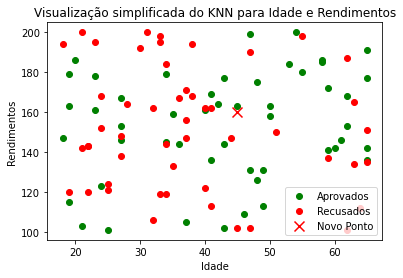

In [62]:
import numpy as np
import matplotlib.pyplot as plt

# Selecionando 100 pontos aleatórios do conjunto de dados
dados_amostra = dados.sample(100)

# Criando um gráfico de dispersão usando as colunas 'Idade' e 'Rendimentos'
aprovados = dados_amostra[dados_amostra['Aprovação'] == 1]
recusados = dados_amostra[dados_amostra['Aprovação'] == 0]

plt.scatter(aprovados['Idade'], aprovados['Rendimentos'], c='green', label='Aprovados')
plt.scatter(recusados['Idade'], recusados['Rendimentos'], c='red', label='Recusados')

# Adicionando um exemplo de novo ponto de dados e prevendo sua classe usando KNN
# Mantendo valores constantes para 'Região', 'Casado' e 'Género'
novo_ponto = np.array([[3, 45, 1, 160, 1]]) # Exemplo: Região = 3, Casado = 1, Género = 1
novo_ponto_classificacao = neigh.predict(novo_ponto)

if novo_ponto_classificacao == 1:
    cor = 'green'
else:
    cor = 'red'

plt.scatter(novo_ponto[0][1], novo_ponto[0][3], c=cor, marker='x', s=100, label='Novo Ponto')

# Adicionando legenda e rótulos aos eixos
plt.xlabel('Idade')
plt.ylabel('Rendimentos')
plt.legend()
plt.title('Visualização simplificada do KNN para Idade e Rendimentos')
plt.show()
